# Planet Amazon Image Classification

The labels can broadly be broken into three groups: atmospheric conditions, common land cover/land use phenomena, and rare land cover/land use phenomena. Each chip will have one and potentially more than one atmospheric label and zero or more common and rare labels.
The common labels in this data set are rainforest, agriculture, rivers, towns/cities, and roads. The overwhelming majority of the data set is labeled as "primary"

## Importing the Data

In [1]:
#import modules
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define files and directories
os.chdir('C:/Users/isado/Documents/SpringBoard/Capstone2/')
         
# Create DataFrame with training labels
train_labels = pd.read_csv('./train_classes.csv')

In [2]:
#Inspecting training labels
train_labels.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
#Extract unique labels
labels = []

for tags in train_labels.tags.values:
    label = tags.split(' ')
    for subitem in label:
        if subitem not in labels:
            labels.append(subitem)
print('Possible labels:\n', labels)

Possible labels:
 ['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


The labels can broadly be broken into three groups: atmospheric conditions, common land cover/land use phenomena, and rare land cover/land use phenomena

In [14]:
atmospheric_labels = ['haze', 'clear', 'cloudy', 'partly_cloudy']
common_land_labels = ['primary', 'agriculture','water','road', 'cultivation','habitation', 'bare_ground']
rare_land_labels = ['selective_logging', 'slash_burn', 'blooming', 'blow_down', 'conventional_mine', 'artisinal_mine']

In [4]:
for label in labels:
    train_labels[label] = train_labels['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
    
train_labels   

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Exploring the Data

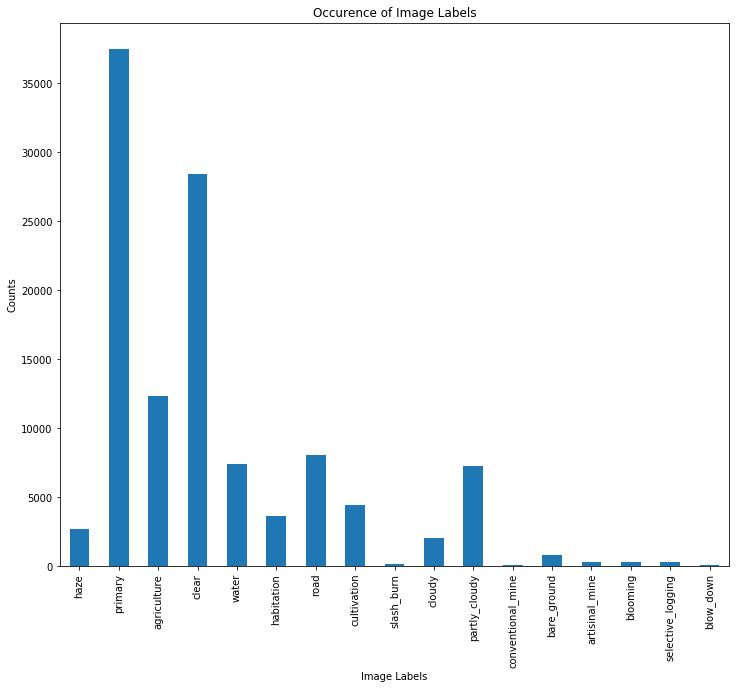

In [46]:
#Examing occurence of labels:
fig = train_labels[labels].sum().plot.bar(figsize=(12,10))
fig.set_ylabel('Counts')
fig.set_xlabel('Image Labels')
fig.set_title('Occurence of Image Labels');

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,0,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,0,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,0,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,0,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,0,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,0,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,0,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,0,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,0,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


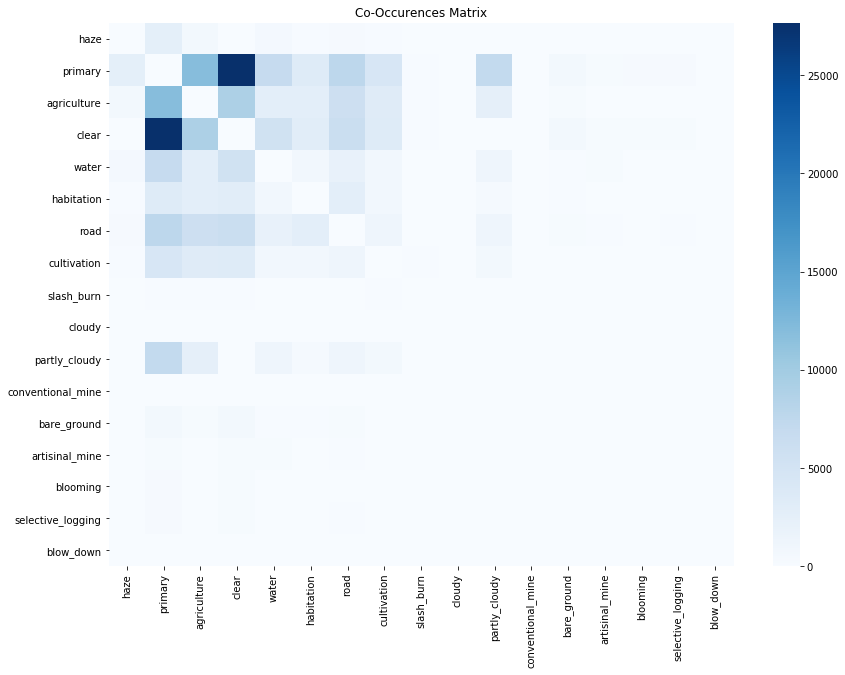

In [53]:
#Examining co-occurence of labels:

def co_occurence(labels):
    #occurences matrix
    oc_matrix = train_labels[labels]
    
    #co-occurrences matrix
    co_oc = oc_matrix.T.dot(oc_matrix)
    co_oc.values[[np.arange(co_oc.shape[0])]*2] = 0
    
    plt.figure(figsize=(14,10))
    sns.heatmap(co_oc, cmap ="Blues")
    plt.title('Co-Occurences Matrix')
    
    return co_oc

co_occurence(labels)

## Inspecting images

Raw images are 16-bit (from 0 to 65535), and contain red, green, blue, and Near infrared (NIR) channels

(256, 256, 3)


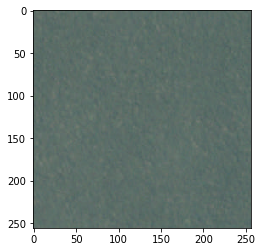

In [123]:
from IPython.display import display
from skimage import io


#Write function to get a specific image

def load_image(file_name, type='jpg'):
    #sample image
    img_path = ('./train-{}/train_{}.{}').format(type,file_name,type)
    img = io.imread(img_path)
    plt.imshow(img)
    return img

image = load_image(0)
print(image.shape)

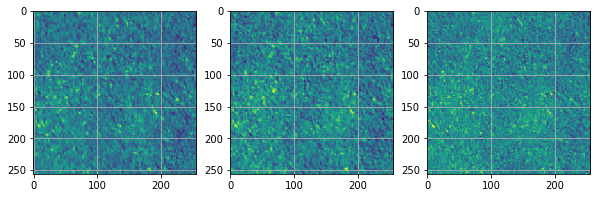

In [119]:
#Breaking down color channels
def extract_rgb(image):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    return r, g, b

r, g, b = extract_rgb(image)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

#Display all 3 channels
for ax, fig in zip(axs,[r,g,b]):
    ax.imshow(fig)
    ax.grid(True)

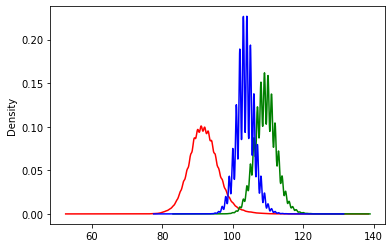

In [122]:
#Look at the kernel density estimate for each of the color channels on the same plot

# code adapted from DataCamp 'Image Loading and Processing' module
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image[:, :, ix], color)

    plt.show()
    
plot_rgb(image)